In [24]:
import matplotlib.pyplot as plt
import numpy as np
import noise_gen as ns
import cv2

In [2]:
images = []
for i in range(10):
    img = plt.imread(f'samples/c_{i}.png')
    img[img != 0] = 1.
    images.append(img)
    
h, w = images[0].shape

In [3]:
map = np.empty((h, w), dtype=str)
map = map.astype('<U11')
for i in range(h):
    for j in range(w):
        map[i, j] = ''
        for k, img in enumerate(images):
            if img[i, j] == 1.0:
                map[i, j] = map[i, j] + str(k)

In [29]:
b = np.unique(map)
b.sort()
b

array(['', '0', '0123458', '01234678', '0123489', '012357', '012358',
       '0123678', '012368', '012378', '0123789', '01238', '012389',
       '0124678', '0125678', '01259', '012678', '0126789', '012689',
       '013', '0135689', '013578', '0135789', '013579', '013589', '01359',
       '013689', '01456789', '014578', '0156789', '016789', '02',
       '02345679', '02345689', '0234569', '0234578', '02345789', '023458',
       '0234589', '02346', '023467', '0234678', '023468', '023478',
       '0234789', '023479', '023489', '023568', '0235689', '02358',
       '02368', '0237', '02378', '023789', '0238', '02389', '024',
       '02456789', '0245689', '024569', '02458', '024589', '02467',
       '024678', '0246789', '024679', '0247', '024789', '0248', '02489',
       '0249', '025', '02568', '02569', '0258', '02678', '02689', '028',
       '03', '0345678', '03456789', '034578', '0345789', '0346', '03467',
       '034679', '03468', '0347', '03478', '035689', '0367', '03689',
       '0369', '

In [12]:
def Q(i, g):
    global map
    res = np.zeros(map.shape)
    for area in np.unique(map):
        if area == '' or str(i) in area:
            continue
        res[map == area] = np.ma.array(g, mask=np.where(map==area, 0, 1)).mean()
    return res

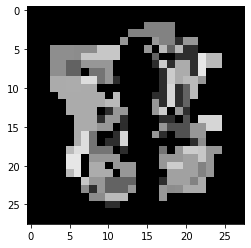

In [33]:

tmp = ns.genNoises(images[7], 210, length = 10)
a = Q(1, tmp[5])
plt.imshow(cv2.cvtColor(a.astype(np.uint8)*255, cv2.COLOR_BGR2RGB))



In [147]:
def argmin(g):
    global images
    values = []
    for i in range(0, 10):
        pr_i_g = Q(i, np.copy(g))
        values.append(np.linalg.norm(pr_i_g))
    return np.argmin(values)

In [207]:
sigmas = [0, 0.05, 0.1, 0.5, 1, 3, 5, 10]
freqs = []
matrixes = []

for sigma in sigmas:
    correct_preds = 0
    matrix = np.zeros((10, 10))
    for i in range(10):
        for _ in range(100):
            img_noice = images[i] + np.random.normal(0, sigma, size=(28,28))
            img_noice[img_noice>1] = 1
            img_noice[img_noice<0] = 0
            predict = argmin(np.copy(img_noice))
            if predict == i:
                correct_preds += 1
            matrix[i, predict] += 1
            # if i == 1 and sigma == 0.01:
            #     print(predict)
            #     plt.imshow(np.copy(img_noice), cmap='gray')
            #     plt.show()
            #     plt.imshow(img_noice, cmap='gray')
            #     plt.show()
            #     plt.imshow(Q(i, img_noice), cmap='gray')
            #     plt.show()
    matrixes.append(matrix)
    freqs.append(1-correct_preds/1000)

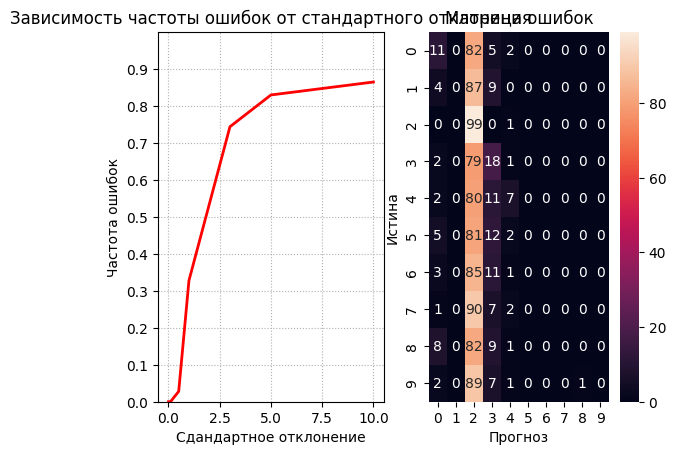

In [208]:
figure, axis = plt.subplots(1, 2)
    
axis[0].set_xlabel('Сдандартное отклонение')
axis[0].set_ylabel('Частота ошибок')
axis[0].set_title('Зависимость частоты ошибок от стандартного отклонения')
axis[0].grid(True, linestyle='dotted')
axis[0].set_ylim(0, 1)
axis[0].set_yticks(np.arange(0, 1, 0.1))
axis[0].plot(sigmas, freqs, linewidth=2, color='r')

sns.heatmap(matrixes[-1], annot=True, fmt='g', ax=axis[1])
axis[1].set_xlabel('Прогноз')
axis[1].set_ylabel('Истина')
axis[1].set_title('Матрица ошибок')

plt.show()